In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
#conn = engine.connect()

In [6]:
Base = automap_base()

In [7]:
# reflect an existing database into a new model

Base.prepare(autoload_with=engine)
# reflect the tables


In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurment= Base.classes.measurement
Station= Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date= session.query(Measurment.date).order_by(Measurment.date.desc()).first()
print(recent_date)

('2017-08-23',)


Query Date:  2016-08-23


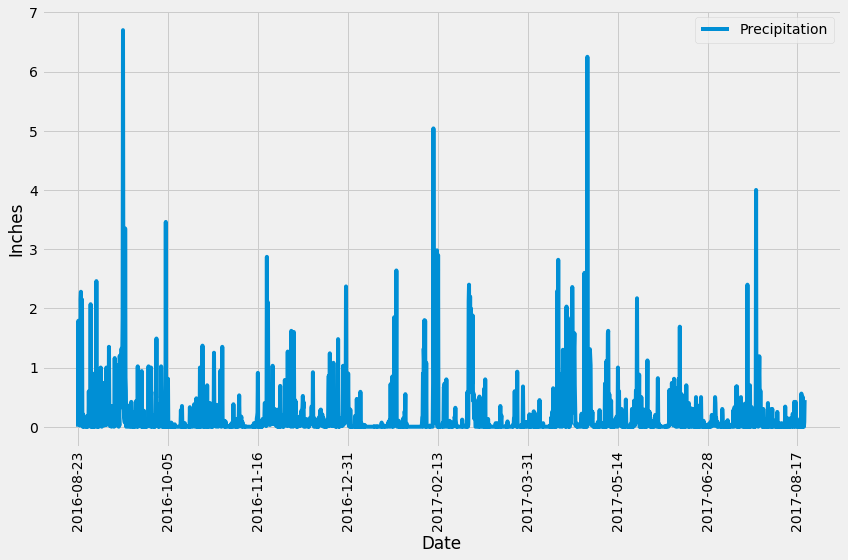

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year= dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date: ", one_year)

# Perform a query to retrieve the data and precipitation scores
data=session.query(Measurment.date, Measurment.prcp).\
    filter(Measurment.date >= one_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df= pd.DataFrame(data, columns = ['Date', 'Precipitation']).set_index('Date')

# Sort the dataframe by date
precipitation_df= precipitation_df.sort_values('Date').dropna()

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(figsize= (12,8), rot=90)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
total_stations= session.query(Station).group_by(Station.id).count()
print(total_stations)

9


In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(Measurment.station, func.count(Measurment.station)).\
    group_by(Measurment.station).\
    order_by(func.count(Measurment.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_stats= session.query(Measurment.station, func.min(Measurment.tobs),\
    func.max(Measurment.tobs), func.avg(Measurment.tobs)).\
    filter(Measurment.station =='USC00519281').all()
station_stats

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

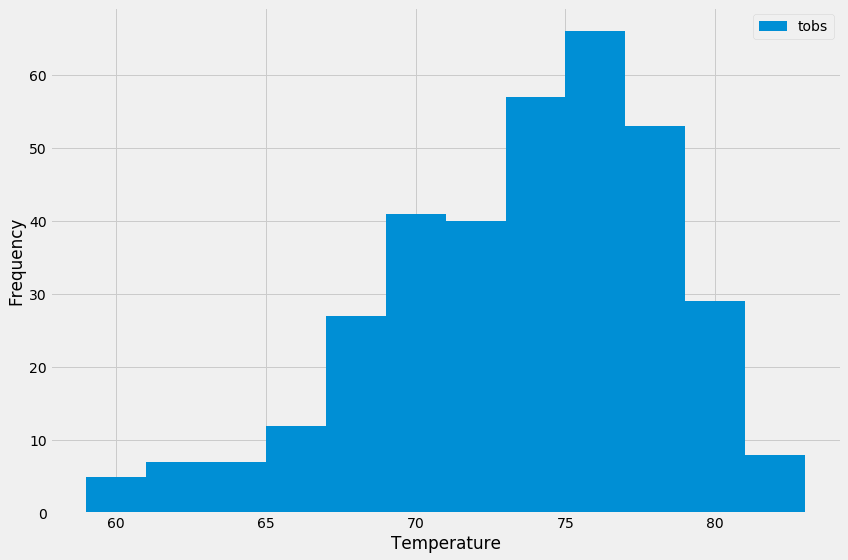

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active= session.query(Measurment.tobs).filter(Measurment.station == 'USC00519281').\
    filter(Measurment.date >= one_year).all()

station_df= pd.DataFrame(most_active)
station_df.plot(kind='hist', figsize=(12,8), bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.tight_layout()
plt.show()


# Close session

In [18]:
# Close Session
session.close()